# Libraries

In [1]:
import pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the yeo-johnson transformation
import scipy.stats as stats

In [2]:
# Load data
facebook_data = pd.read_csv('../data/01_raw/Facebook_Live.csv')

# Display the first few rows of the dataset
facebook_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
print(f"Shape of the dataframe: {facebook_data.shape}")

n_ids = facebook_data["status_id"].nunique()

print(f"Unique IDs: {n_ids}")


Shape of the dataframe: (7046, 12)
Unique IDs: 6993


In [4]:
# ><

repeated_counts = facebook_data["status_id"].value_counts()
repeated_counts = repeated_counts[repeated_counts > 1]

for repeated_id in repeated_counts.index:
    print(facebook_data[facebook_data["status_id"] == repeated_id])

                            status_id status_type status_published  \
6209  819700534875473_957599447752247       photo  3/24/2018 23:51   
6260  819700534875473_957599447752247       photo  3/24/2018 23:51   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
6209            157            16           3        145          1        11   
6260            157            16           3        145          1        11   

      num_hahas  num_sads  num_angrys  
6209          0         0           0  
6260          0         0           0  
                            status_id status_type status_published  \
6190  819700534875473_972433889602136       photo   4/20/2018 3:16   
6241  819700534875473_972433889602136       photo   4/20/2018 3:16   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
6190           1271            94           9       1249         11         8   
6241           1271            94           9       

In [5]:
duplicated_vars = ["status_id"]

facebook_data = facebook_data.drop_duplicates(subset=["status_id"], keep='first')

In [6]:
facebook_data["status_type"].value_counts()

status_type
photo     4240
video     2331
status     359
link        63
Name: count, dtype: int64

In [26]:
def plot_histograms(df, num_cols):
    
    for num_col in num_cols:
        plt.figure()
        df[num_col].hist(bins=50)
        plt.title(f'Histogram of {num_col}')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.show()

num_reactions    0.0
num_comments     0.0
num_shares       0.0
num_likes        0.0
num_loves        0.0
num_wows         0.0
num_hahas        0.0
num_sads         0.0
num_angrys       0.0
dtype: float64


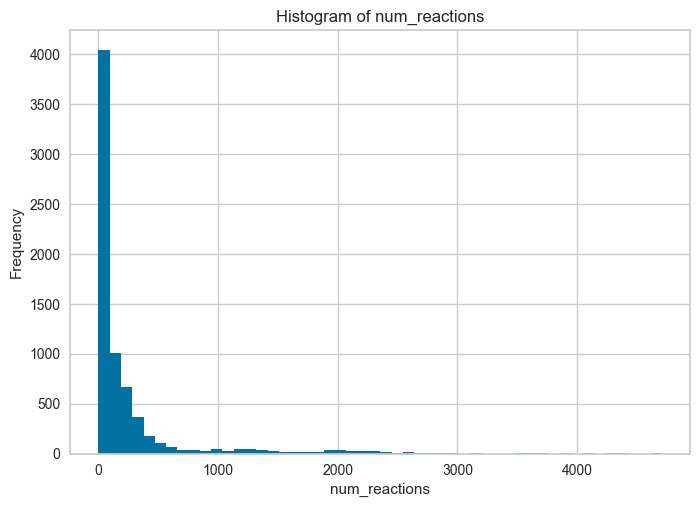

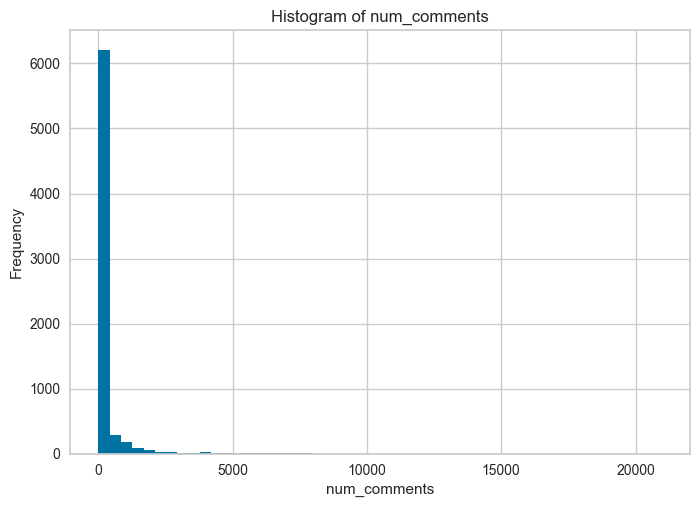

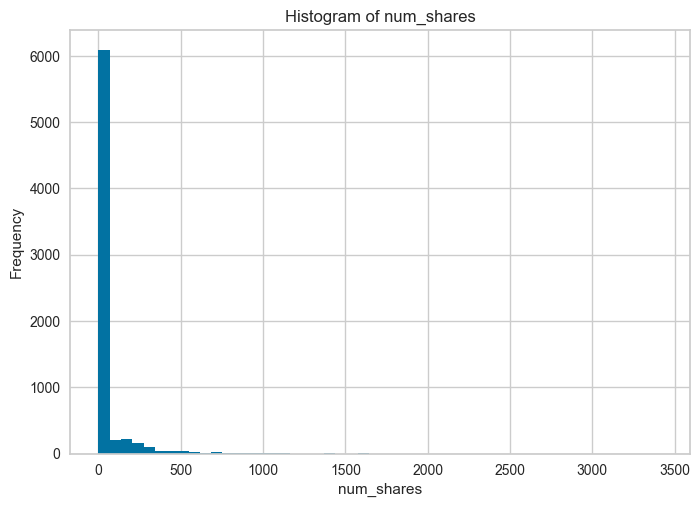

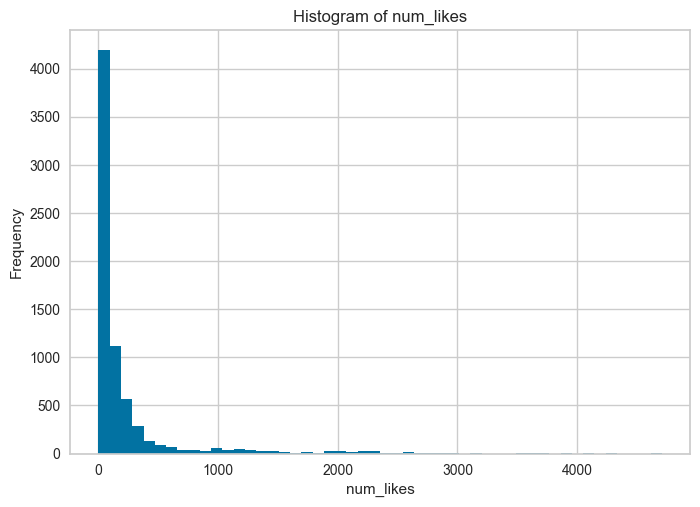

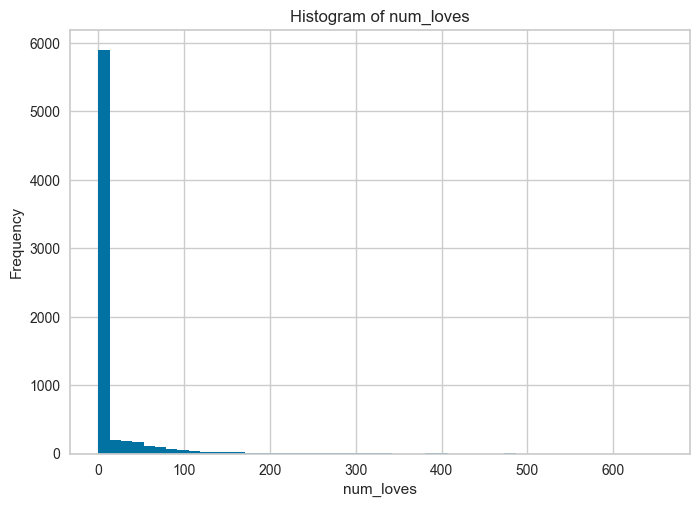

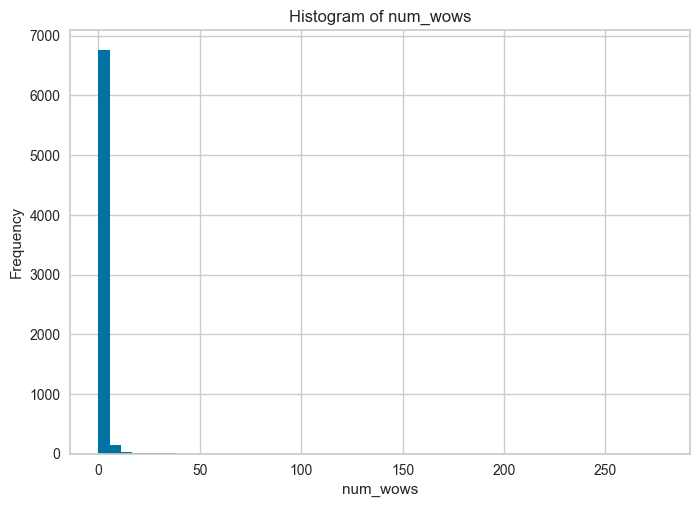

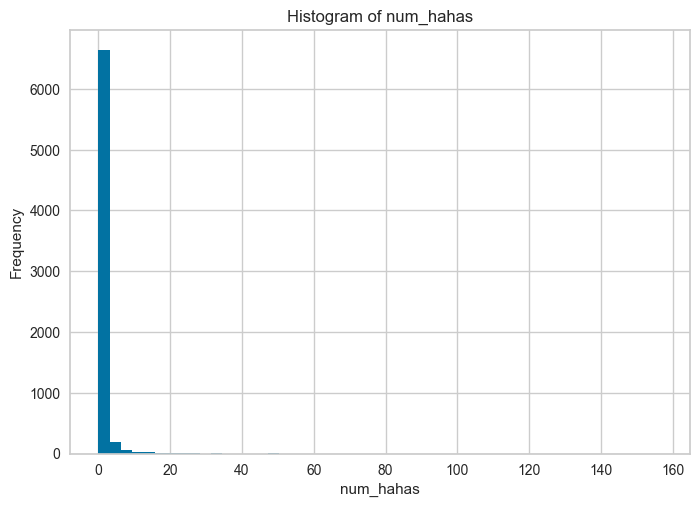

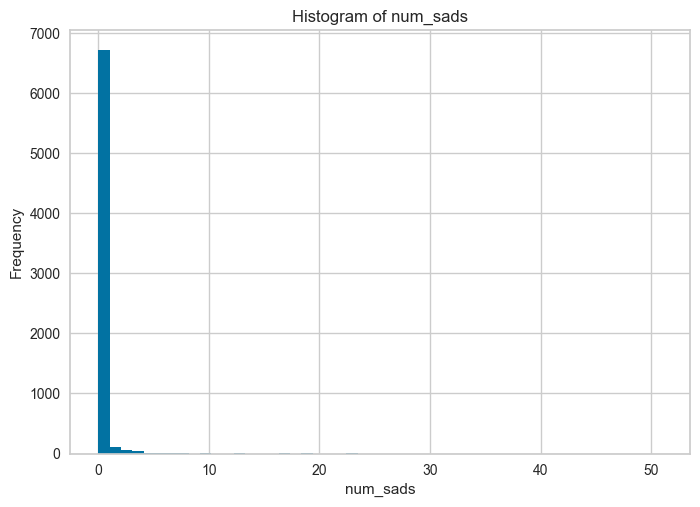

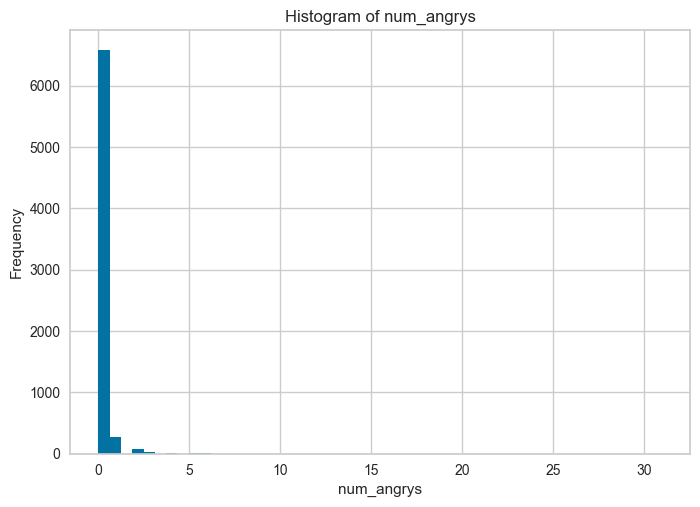

In [27]:
num_cols = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

print(facebook_data[num_cols].isnull().mean().sort_values(ascending=False))

plot_histograms(facebook_data, num_cols)
    

In [9]:
#for num_col in num_cols:
#    facebook_data[num_col], param = stats.yeojohnson(facebook_data[num_col])
#plot_histograms(facebook_data, num_cols)

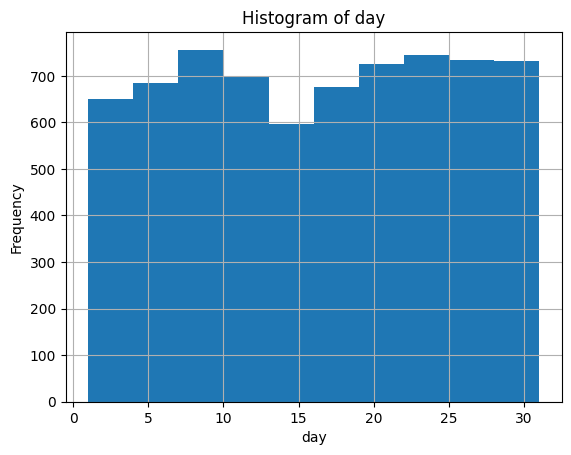

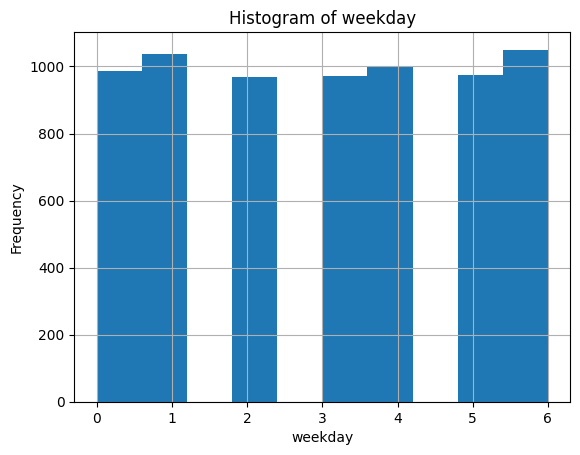

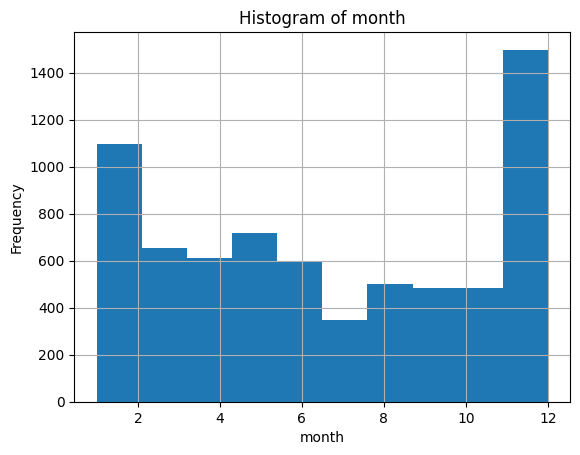

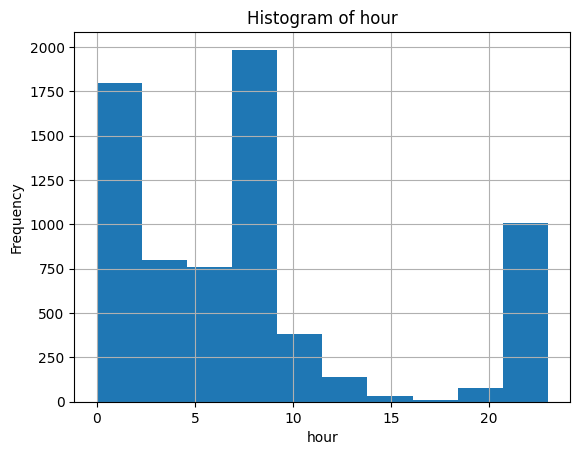

In [10]:
facebook_data["status_published"] = pd.to_datetime(facebook_data["status_published"])

facebook_data["day"] = facebook_data["status_published"].dt.day
facebook_data["weekday"] = facebook_data["status_published"].dt.weekday
facebook_data["month"] = facebook_data["status_published"].dt.month
facebook_data["hour"] = facebook_data["status_published"].dt.hour

date_cols = ["day", "weekday", "month", "hour"]
plot_histograms(facebook_data, date_cols)

In [11]:
facebook_data["status_id"].apply(lambda x: x.split("_")[0]).value_counts()

status_id
246675545449582     2629
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: count, dtype: int64

In [12]:
facebook_data["event"] = facebook_data["status_id"].apply(lambda x: x.split("_")[0])

In [13]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["status_type", 'day', 'weekday', 'month', 'hour', 'event']
encoder = OneHotEncoder(drop=None, sparse_output=False)

encoded_data = encoder.fit_transform(facebook_data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original columns and concatenate the encoded ones
facebook_data = facebook_data.drop(columns=categorical_columns).reset_index(drop=True)
full_data =  pd.concat([facebook_data, encoded_df], axis=1)

In [14]:
full_data = full_data.drop(["status_id", "status_published"], axis=1)

In [28]:
full_data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,...,hour_23,event_1050855161656896,event_117059915488335,event_134115277150304,event_146481362756646,event_246675545449582,event_614855718638584,event_725980084255106,event_819700534875473,event_848451358648417
0,529,512,262,432,92,3,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,150,0,0,150,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,227,236,57,204,21,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,111,0,0,111,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,213,0,0,204,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,89,0,0,89,0,0,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6989,16,0,0,14,1,0,1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6990,2,0,0,1,1,0,0,0,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6991,351,12,22,349,2,0,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier

class FeatureSelector:
    def __init__(self, dataframe):
        self.df = dataframe

    def calculate_iterations(
        self, n_features, base_iterations=100, multiplier=50
    ):
        """
        Calculate the number of iterations based on the number of features.
        """
        n_iterations = base_iterations + multiplier * np.log(n_features)
        return int(n_iterations)

    def tree_based_feature_importance(self, n_select_features, rf_params=None):
        """
        Unsupervised Feature Selection with Random Forests (UFSRF)
        """
        # Number of features to select
        n_features = n_select_features

        # Calculate the number of iterations based on the total features
        n_iterations = self.calculate_iterations(self.df.shape[1])

        # Placeholder for feature importances across all iterations
        aggregated_importances = np.zeros(self.df.shape[1])

        # Ensure all data is float type
        df_float = self.df.astype(float)

        # Setting default RandomForest parameters if none provided
        if rf_params is None:
            rf_params = {
                "n_estimators": 150,
                "max_depth": 10,
                "random_state": 42,
            }

        for _ in range(n_iterations):
            # Generating random discrete class labels for classification
            random_labels = np.random.randint(0, 2, df_float.shape[0])
            model = RandomForestClassifier(**rf_params)
            model.fit(df_float, random_labels)
            aggregated_importances += model.feature_importances_

        # Averaging feature importances over all iterations
        aggregated_importances /= n_iterations

        # Sorting features based on their aggregated importance scores
        important_features = df_float.columns[
            np.argsort(aggregated_importances)[-n_features:]
        ]

        return df_float[important_features]

In [ ]:
selector = FeatureSelector(full_data[num_cols])
selected_features_df = selector.tree_based_feature_importance(n_select_features=30)

In [16]:
full_data.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'day_31', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       '

In [17]:
cat_cols = ['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video',
            'event_1050855161656896', 'event_117059915488335', 'event_134115277150304', 
            'event_146481362756646', 'event_246675545449582', 'event_614855718638584',
            'event_725980084255106', 'event_819700534875473', 'event_848451358648417']

all_cats = num_cols + cat_cols

In [18]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(full_data[all_cats], normalize = True)

,Description,Value
0,Session id,8877
1,Original data shape,"(6993, 22)"
2,Transformed data shape,"(6993, 22)"
3,Numeric features,22
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [19]:
# OOP API
kmeans = s.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1978,676.2150,2.1016,0,0,0


In [20]:
s.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
result = s.assign_model(kmeans)
result.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,...,event_1050855161656896,event_117059915488335,event_134115277150304,event_146481362756646,event_246675545449582,event_614855718638584,event_725980084255106,event_819700534875473,event_848451358648417,Cluster
0,529,512,262,432,92,3,1,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cluster 1
1,150,0,0,150,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cluster 0
2,227,236,57,204,21,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cluster 3
3,111,0,0,111,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cluster 0
4,213,0,0,204,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cluster 0


In [22]:
result["Cluster"].value_counts()

Cluster
Cluster 0    3685
Cluster 3    2475
Cluster 1     725
Cluster 2     108
Name: count, dtype: int64

In [23]:
sum_groups = result.groupby("Cluster").sum()

In [24]:
sum_groups[num_cols]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
Cluster,,,,,,,,,
Cluster 0,978543,65543,9581,969948,5014,2477,504,493,94
Cluster 1,194365,1089802,172155,141744,48122,1157,2262,750,324
Cluster 2,142128,285617,75517,109974,25775,4244,1609,238,288
Cluster 3,257782,136582,24390,245960,10227,880,507,147,61


In [25]:
sum_groups.loc[:, ['status_type_photo', 'status_type_link', 'status_type_status', 'status_type_video']]

,status_type_photo,status_type_link,status_type_status,status_type_video
Cluster,,,,
Cluster 0,3240.0,50.0,325.0,70.0
Cluster 1,8.0,0.0,0.0,717.0
Cluster 2,4.0,0.0,1.0,103.0
Cluster 3,988.0,13.0,33.0,1441.0
